# Conventions

## Spherical harmonics


In jaxoplanet, spherical harmonics are real and normalized. They are represented by a 1D vector of coefficient $y$ ordered by $l$ and $m$ such that

$$
y = [Y_{0,0}, Y_{1,-1}, Y_{1,0}, Y_{1,1}, Y_{2,-2}, Y_{2,-1}, Y_{2,0}, Y_{2,1}, Y_{2,2}, ... ]
$$

For reference, here's what the first several spherical harmonic degrees look like:

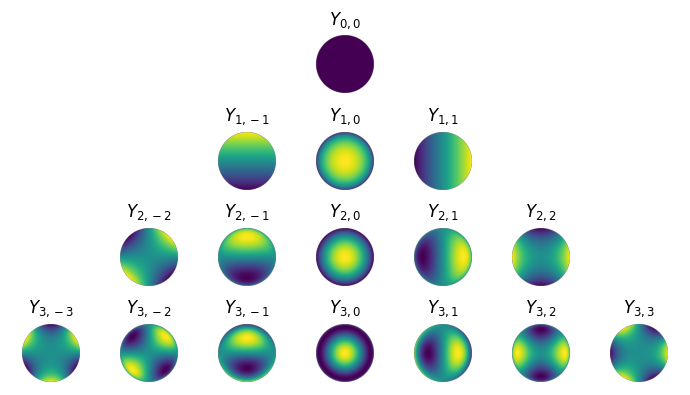

In [1]:
import numpy as np
from jaxoplanet.starry import show_surface
import matplotlib.pyplot as plt


l_max = 3

fig, ax = plt.subplots(l_max + 1, 2 * l_max + 1, figsize=(7, 4))

fig.subplots_adjust(hspace=0)
for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.spines["bottom"].set_visible(False)
    axis.spines["left"].set_visible(False)

I = 0
# Loop over the orders and degrees
for i, l in enumerate(range(l_max + 1)):
    for j, m in enumerate(range(-l, l + 1)):
        # Offset the index for centered plotting
        j += l_max - l

        # Plot the spherical harmonic
        y = np.zeros((l_max + 1) ** 2)
        y[I] = 1
        show_surface(y, ax=ax[i, j], n=None)
        ax[i, j].set_xlim(-1.1, 1.1)
        ax[i, j].set_ylim(-1.1, 1.1)
        ax[i, j].set_title(f"$Y_{{{l},{m}}}$")
        I += 1


plt.tight_layout()

## Coordinates

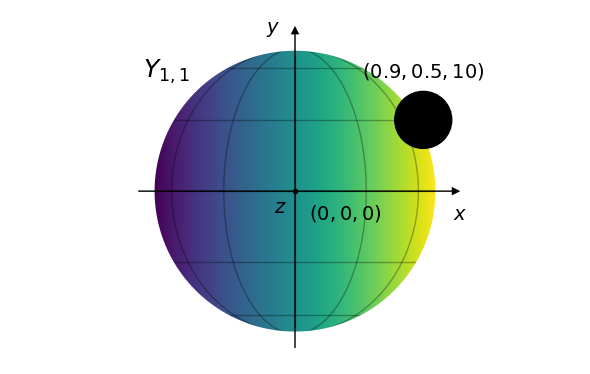

In [2]:
plt.figure(figsize=(6, 4))

y = np.array([0.0, 0.0, 0.0, 1.0])
show_surface(y)
plt.xlim(-2, 2)

xo, yo, zo = 0.9, 0.5, 10
r = 0.2
circle = plt.Circle((xo, yo), r, color="k", zorder=10)
plt.gca().add_artist(circle)
color1 = "k"
arrow_style = dict(
    head_width=0.06, head_length=0.06, zorder=10, width=0.01, lw=0, color=color1
)
L = 1.1
plt.plot(0, 0, ".", c=arrow_style["color"], ms=6)
plt.arrow(0, -L, 0, 2 * L, **arrow_style)
plt.arrow(-L, 0, 2 * L, 0, **arrow_style)
plt.text(0.1, -0.2, "$(0,0,0)$", color=color1, fontsize=14)
plt.text(L * 1.01, -0.2, "$x$", color=color1, fontsize=14)
plt.text(-0.2, L * 1.01, "$y$", color=color1, fontsize=14)
plt.text(-0.15, -0.15, "$z$", color=color1, fontsize=14)
plt.text(
    xo, yo + 1.5 * r, f"$({xo},{yo},{zo})$", color=color1, fontsize=14, ha="center"
)
plt.text(-0.9, 0.8, "$Y_{1,1}$", fontsize=18, ha="center", color=color1)
plt.tight_layout()